In [197]:
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
data = pd.read_csv("winequality_cleaned.csv",sep=';')

### Load and Prepare/Check the Data

In [181]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,6056.000000,6096.000000
mean,7.108801,0.331413,0.311841,5.388583,0.051712,30.555692,116.745079,0.994481,3.221243,0.521649,10.525357,5.840879
std,1.106014,0.153820,0.135536,4.572691,0.020752,16.690643,54.821944,0.002817,0.159042,0.130236,1.192759,0.867578
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.225000,0.240000,1.800000,0.037000,17.000000,82.000000,0.992175,3.110000,0.430000,9.500000,5.000000
50%,6.900000,0.290000,0.310000,3.000000,0.046000,29.000000,119.000000,0.994700,3.210000,0.500000,10.400000,6.000000
75%,7.600000,0.390000,0.380000,8.100000,0.060000,41.000000,156.000000,0.996760,3.320000,0.590000,11.300000,6.000000
max,11.800000,0.955000,0.810000,22.600000,0.147000,97.000000,303.000000,1.001000,3.850000,1.040000,14.200000,9.000000


In [182]:
# Save original header for future use
original_header = data.columns.values;

In [183]:
data.isnull().sum()

type                     0
fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                 40
quality                  0
dtype: int64

In [184]:
data.dropna(axis=0, inplace=True)

In [185]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [186]:
data['quality'].value_counts()

6    2655
5    1958
7    1039
4     195
8     187
3      17
9       5
Name: quality, dtype: int64

In [187]:
data.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,6.9,0.390,0.40,4.6,0.022,5.0,19.0,0.99150,3.31,0.37,12.60,3
1,White,7.6,0.480,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.40,3
2,White,11.8,0.230,0.38,11.1,0.034,15.0,123.0,0.99970,2.93,0.55,9.70,3
3,Red,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
4,White,6.8,0.260,0.34,15.1,0.060,42.0,162.0,0.99705,3.24,0.52,10.50,3
5,White,4.2,0.215,0.23,5.1,0.041,64.0,157.0,0.99688,3.42,0.44,8.00,3
6,White,10.3,0.170,0.47,1.4,0.037,5.0,33.0,0.99390,2.89,0.28,9.60,3
7,White,8.5,0.260,0.21,16.2,0.074,41.0,197.0,0.99800,3.02,0.50,9.80,3
8,White,6.1,0.200,0.34,9.5,0.041,38.0,201.0,0.99500,3.14,0.44,10.10,3
9,White,5.8,0.240,0.44,3.5,0.029,5.0,109.0,0.99130,3.53,0.43,11.70,3


### One-Hot Encode Wine Type Variable

In [188]:
data['type'].replace(to_replace = 'White', value=0, inplace = True);
data['type'].replace(to_replace = 'Red', value=1, inplace = True);

In [189]:
X = data.iloc[:,0:data.shape[1]-1].values
y = data.iloc[:,-1].values

In [190]:
print(X.shape, y.shape)

(6056, 12) (6056,)


### Scaling the Dataset

In [191]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

### Stratified Train/Test Split
Ensure that train/test dataset have se same class balance

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

### Output Train/Test Dataset for future use

In [193]:
# Train
train_df = pd.DataFrame(data = X_train, columns=original_header[:-1])
train_df[original_header[-1]] = y_train

In [194]:
# Test
test_df = pd.DataFrame(data = X_test, columns=original_header[:-1])
test_df[original_header[-1]] = y_test

In [195]:
# Save to csv's
train_df.to_csv("wine_train.csv", sep=',')
test_df.to_csv("wine_test.csv", sep=',')

### Encoding the Output Variable

In [196]:
from sklearn.preprocessing import LabelEncoder

def output_encoder(data):    
    # encode class values as integers
    encoder = LabelEncoder()
    encoder.fit(data)
    encoded_Y = encoder.transform(data)

    # convert integers to dummy variables (i.e. one hot encoded)
    dummy_y = np_utils.to_categorical(encoded_Y)
    
    return dummy_y

y_train = output_encoder(y_train)
y_test = output_encoder(y_test)

### Building the Neural Network Architecture

In [178]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
model = Sequential()
model.add(Dense(48, activation='relu', input_shape=(12,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(7, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 48)                624       
_________________________________________________________________
dropout_3 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                3136      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 455       
Total params: 4,215
Trainable params: 4,215
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'acc'])


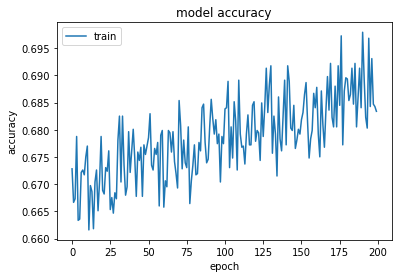

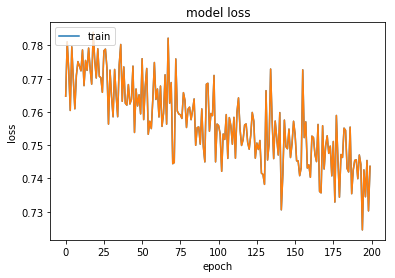

In [200]:
# Training the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Scoring the Model

In [201]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

4542/4542 [==============================] - 1s 322us/step

 Training Accuracy: 0.7879788640153298
1514/1514 [==============================] - 0s 132us/step

 Testing Accuracy: 0.5997357992861356
